# <font color="#2E86C1"><b>AICE Associate 4회 모의고사</b></font>
---

##  <font color="#117A65"><b>차량 연비 예측</b></font>

### <font color="#5D6D7E"><b>목적</b></font>  
<b>차량의 제원 및 주행 성능 정보를 바탕으로 연비(`mpg`)를 예측</b>하여  
고연비 차량 개발, 고객 맞춤형 추천 서비스 등에 활용할 수 있도록  
예측 모델을 구축합니다.

### <font color="#5D6D7E"><b>배경 시나리오</b></font>

자동차 제조사 <b>B사</b>는 연비 효율에 대한 소비자들의 관심이 높아짐에 따라  
각 차량의 스펙(엔진, 무게, 가속도 등)과 실제 연비(`mpg`) 간의 관계를 분석하고,  
연비 예측 모델을 개발하고자 합니다.  

회사는 다양한 차종의 연비와 차량 제원 데이터를 수집하였으며,  
다음 정보를 기반으로 <b>연비(`mpg`)</b>를 예측하는 회귀 모델을 구축하려고 합니다.

---

### 📊 <font color="#5D6D7E"><b>데이터 설명</b></font>  
<b>파일 이름: `auto_mpg.xlsx`</b>

| 컬럼명           | 설명                                                              |
|------------------|-------------------------------------------------------------------|
| `mpg`            | <mark><b>연비 (Miles Per Gallon)</b></mark> ← <b>예측 대상</b>     |
| `cylinders`      | 실린더 수                                                         |
| `displacement`   | 배기량 (단위: cubic inches)                                       |
| `horsepower`     | 마력                                                              |
| `weight`         | 차량 무게 (단위: lbs)                                             |
| `acceleration`   | 가속 성능 (0→60mph까지 걸리는 시간, 초 단위)                     |
| `model_year`     | 차량 출시 연도 (예: 70 = 1970)                                     |
| `origin`         | 제조 국가 코드 (1: 미국, 2: 유럽, 3: 일본)                        |
| `name`           | 차량 이름 (예: "chevrolet chevelle malibu")                      |

---


### 문제 1. 라이브러리 불러오기

🎯 목표  
데이터 분석을 위해 pandas, numpy, seaborn, matplotlib 라이브러리를 불러옵니다.

📑 조건  
- pandas를 `pd`, numpy를 `np`, seaborn을 `sns`, matplotlib.pyplot을 `plt`로 임포트하세요.



In [56]:
# 여기에 답안을 작성하세요.


##### **정답코드**

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### 문제 2. 데이터 파일 불러오기

🎯 목표  
auto_mpg.xlsx 파일을 불러와 mpg_df 데이터프레임을 생성합니다.

📑 조건
- pandas를 이용하여 파일을 읽고 `mpg_df`에 저장하세요.



In [58]:
# 여기에 답안코드를 작성하세요.


##### **정답코드**

In [59]:
mpg_df = pd.read_csv('data/auto-mpg.csv')
# 이렇게 미리 컬럼 이름을 지정해도 좋다.
# mpg_df = pd.read_csv('data/auto-mpg.csv', names=['연비','실린더 수','배기량','마력','차량 무게','가속 성능','차량 출시 연도','제조 국가 코드','차량 이름'])
mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.00,8.0,307.00,130.00,3504.00,12.00,70.0,1,chevrolet chevelle malibu
1,15.00,8.0,350.00,165.00,3693.00,11.50,70.0,1,buick skylark 320
2,18.00,8.0,318.00,150.00,3436.00,11.00,70.0,1,plymouth satellite
3,16.00,8.0,304.00,150.00,3433.00,12.00,70.0,1,amc rebel sst
4,17.00,8.0,302.00,140.00,3449.00,10.50,70.0,1,ford torino
...,...,...,...,...,...,...,...,...,...
503,NaN,8.0,NaN,159.86,3645.17,22.23,71.0,1,missing model 687
504,NaN,NaN,NaN,183.61,3201.03,12.63,76.0,1,missing model 921
505,12.07,6.0,NaN,126.84,3443.07,24.24,74.0,1,missing model 861
506,NaN,NaN,110.29,147.59,3541.82,NaN,NaN,3,missing model 715


## [문제 3] 컬럼명 변경

🎯 목표
- 영어로 되어져 있는 컬럼명을 한글로 수정하고자 합니다.

📑 컬럼명 변경 조건
  - mpg	연비
  - cylinders = 실린더 수
  - displacement = 배기량
  - horsepower = 마력
  - weight = 차량 무게
  - acceleration = 가속 성능 
  - model_year = 차량 출시 연도
  - origin = 제조 국가 코드
  - name = 차량 이름

📑 조건
- inplace = True

In [60]:
# 여기에 답안코드를 작성하세요.


##### **정답코드**

In [61]:
mpg_df.rename(columns={
     'mpg': '연비',
    'cylinders': '실린더 수',
    'displacement': '배기량',
    'horsepower': '마력',
    'weight': '차량 무게',
    'acceleration': '가속 성능',
    'model_year': '차량 출시 연도',
    'origin': '제조 국가 코드',
    'name': '차량 이름'
}, inplace=True)

## [문제 4] 결측치 확인 및 처리

🎯 목표
- 전체 컬럼에 대한 결측치를 확인하는 코드를 이용하여, 결측치를 처리하세요.

📑 조건
- 결측치가 존재하는 해당 행 삭제
- 처리한 데이터는 del_df 변수에 저장

In [62]:
# 여기에 답안코드를 작성하세요.

##### **정답코드**

In [63]:
del_df = mpg_df.dropna()
del_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 498 entries, 0 to 497
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   연비        498 non-null    float64
 1   실린더 수     498 non-null    float64
 2   배기량       498 non-null    float64
 3   마력        498 non-null    float64
 4   차량 무게     498 non-null    float64
 5   가속 성능     498 non-null    float64
 6   차량 출시 연도  498 non-null    float64
 7   제조 국가 코드  498 non-null    int64  
 8   차량 이름     498 non-null    object 
dtypes: float64(7), int64(1), object(1)
memory usage: 38.9+ KB


### 한글 깨짐을 방지하기 위해 아래의 코드를 실행하여 주세요.

In [64]:
import matplotlib.font_manager as fm
import platform

# 운영체제별 폰트 설정
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')  # 윈도우: 맑은 고딕
elif platform.system() == 'Darwin':  # macOS
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='NanumGothic')  # 리눅스: 나눔고딕 설치 필요

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

## [문제 5] 이상치 제거

🎯 목표  
마력과 연비에 대한 그래프를 확인하고 이상치를 제거하고자 합니다.

[사전 실행 지시사항]
- 아래 셀을 실행하여 scatterplot을 확인하세요.


<Axes: xlabel='마력', ylabel='연비'>

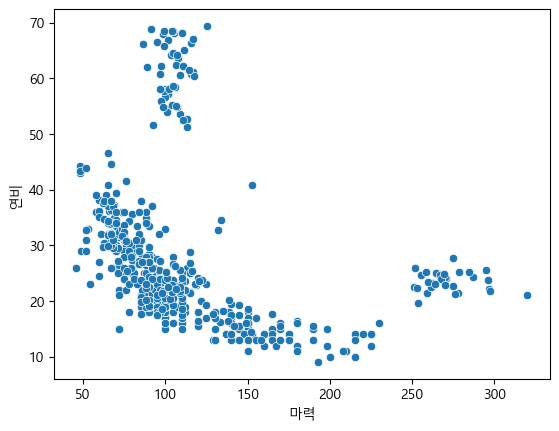

In [65]:
sns.scatterplot(data=del_df, x='마력', y='연비')

📑 조건  
위의 그래프를 보면 이상치가 존재한다는 것을 확인할 수 있습니다.

- 마력이 150이상이면서 연비가 50 초과하는 이상치를 제거하세요.
- inplace= True

In [66]:
# 여기에 답안코드를 작성하세요.


##### **정답코드**

In [67]:
bool_idx = ~((del_df['마력'] > 150) & (del_df['연비'] > 50))
# 위 차트를 보면 사실 조건을 만족하는 이상치는 없다.
# del_df.drop(del_df[(del_df['마력'] >= 150) & (del_df['연비'] > 50)].index, inplace=True)
del_df = del_df[bool_idx]
del_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 498 entries, 0 to 497
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   연비        498 non-null    float64
 1   실린더 수     498 non-null    float64
 2   배기량       498 non-null    float64
 3   마력        498 non-null    float64
 4   차량 무게     498 non-null    float64
 5   가속 성능     498 non-null    float64
 6   차량 출시 연도  498 non-null    float64
 7   제조 국가 코드  498 non-null    int64  
 8   차량 이름     498 non-null    object 
dtypes: float64(7), int64(1), object(1)
memory usage: 38.9+ KB


## [문제 6] 연속형 변수 상관 관계 해석
🎯 목표

- seaborn의 heatmap을 이용하여 변수들 간의 상관 관계 그래프를 그리세요.
- 가장 적절한 해석을 답06 변수에 저장하세요.

[사전 실행 지시사항]
- 아래 리스트를 이용하여 히트맵을 그리세요.

In [68]:
col_list = ['배기량','마력','차량 무게','가속 성능']
col_list_num = del_df.select_dtypes(include=np.number).columns.tolist()
print(col_list_num)

['연비', '실린더 수', '배기량', '마력', '차량 무게', '가속 성능', '차량 출시 연도', '제조 국가 코드']


📑 조건  
- col_list를 이용하여 히트맵을 그리세요.
- annot = True

📑 보기

1. 배기량과 차량 무게는 함께 사용하는 것이 일반적이므로 모두 유지한다.

2. 마력과 배기량은 상관계수가 낮으므로 배기량을 남기고 마력을 제거한다.

3. 배기량과 차량 무게는 높은 상관관계를 가지므로, 예측력이나 변수 중요도를 고려하여 차량 무게를 제거한다.

4. 모든 변수는 예측력이 있으므로, 상관관계에 관계없이 모두 사용하는 것이 바람직하다.

In [69]:
# 여기에 답안코드를 작성하세요.


##### **정답코드**

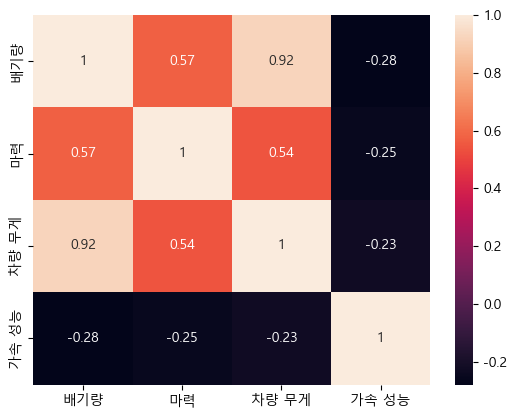

In [70]:
sns.heatmap(data=del_df[col_list].corr(), annot=True)
답06 = 3

## [문제 7] 불필요 컬럼 제거

🎯 목표  
예측 모델의 성능을 높이기 위해 불필요한 변수들을 제거하고자 합니다.

📑 조건  
- 문제 6번에서 선택한 보기에 따라 다중공선성이 우려되는 변수를 제거합니다.
- 여기에 더해 다음의 3개 변수도 함께 제거하세요: '차량 출시 연도', '제조 국가 코드', '차량 이름'
- 단, 문제 6번에서 선택한 변수를 유지하기로 했다면, 위 3개 컬럼만 제거합니다.
- 처리된 데이터는 clear_df 변수에 저장

In [71]:
# 여기에 답안코드를 작성하세요.


##### **정답코드**

In [72]:
clear_df = del_df.drop(['차량 무게', '차량 출시 연도', '제조 국가 코드', '차량 이름'], axis=1)
clear_df

,연비,실린더 수,배기량,마력,가속 성능
0,18.00,8.0,307.00,130.00,12.00
1,15.00,8.0,350.00,165.00,11.50
2,18.00,8.0,318.00,150.00,11.00
3,16.00,8.0,304.00,150.00,12.00
4,17.00,8.0,302.00,140.00,10.50
...,...,...,...,...,...
493,66.25,4.0,211.20,86.67,15.91
494,55.27,4.0,169.96,103.97,14.84
495,65.83,4.0,174.51,99.42,14.75
496,61.59,8.0,195.72,114.15,15.07


## [문제 8] 범주형 변수 인코딩

🖋 상황 설명  
실린더 수 컬럼을 get_dummies로 변환하세요.

🎯 목표
- drop_first=True 옵션 사용
- 처리된 데이터는 encoding_df 변수에 저장하세요.

In [73]:
# 여기에 답안코드를 작성하세요.

##### **정답코드**

In [74]:
encoding_df = pd.get_dummies(data=clear_df, columns=['실린더 수'], drop_first=True)

## [문제 9] train/test 데이터 분리

🎯 목표  
train_test_split을 이용하여 데이터를 분리하려고 합니다.

📑 조건  
- Feature: 연비 컬럼 제외 전부
- Target: 연비
- 데이터셋을 분리하기 위해 train_test_split을 import하세요.
- 훈련 데이터 셋 = X_train, y_train
- 검증 데이터 셋 = X_valid, y_valid
- random_state=42
- 훈련 데이터셋과 검증 데이터셋의 비율은 8:2

In [75]:
# 여기에 답안코드를 작성하세요.

##### **정답코드**

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(encoding_df.drop(columns='연비'), encoding_df['연비'], test_size=0.2, random_state=42)

## [문제 10] 데이터 표준화

🎯 목표  
데이터 스케일링을 통해 모델 학습의 성능을 높입니다.

[사전 실행 지시사항]
- 아래 셀을 실행하여 StandardScaler를 불러오세요.

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

📑 조건  
- StandardScaler를 이용해 Feature 데이터를 스케일링하세요.
- X_train은 fit_tranform을 이용하여 X_train 변수에 저장
- X_valid는 transform을 이용하여 X_test의 변수에 저장

In [78]:
# 여기에 답안을 작성하세요.


##### **정답코드**

In [79]:
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

## [문제 11] 서포트 벡터 머신(SVM) 모델 학습
🎯 목표  
서포트 벡터 머신(SVM)을 활용하여 연비를 예측합니다.

[사전 실행 지시사항]
- 아래 셀을 실행하여 서포트 벡터 머신의 회귀모델인 SVR을 불러오세요.

In [80]:
from sklearn.svm import SVR

📑 조건  
- SVR 모델은 svr 변수에 저장하세요.
- kernel='rbf', C=1.0, epsilon=0.2
- 훈련은 스케일링 처리된 데이터를 사용해 주세요.

In [81]:
# 여기에 답안코드를 작성하세요.


##### **정답코드**

In [82]:
svr = SVR(kernel='rbf', C=1.0, epsilon=0.2)
svr.fit(X_train, y_train)
print(svr.score(X_train, y_train))
print(svr.score(X_valid, y_valid))
# .score Return coefficient of determination(R2) on test data.  1.0 is best possible. Negative means model is bad.

0.19324286775912836
0.08388066030084806


## [문제 12] 랜덤포레스트 회귀 모델 학습

🎯 목표  
랜덤포레스트 모델을 활용하여 연비를 예측합니다.

[사전 실행 지시사항]
- 아래 셀을 실행하여 RandomForestRegressor를 불러오세요.

In [83]:
from sklearn.ensemble import RandomForestRegressor

📑 조건  
- 랜덤포레스트모델을 rfr변수에 저장하세요.
- n_estimators=200, max_depth=10, min_samples_split=7, random_state=42
- 훈련은 스케일링 처리된 데이터를 사용해 주세요.

In [84]:
# 여기에 답안코드를 작성하세요.

##### **정답코드**

In [ ]:
rfc = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=7, random_state=42)
rfc.fit(X_train,y_train)
print(rfc.score(X_train,y_train))
print(rfc.score(X_valid,y_valid))
# model is not good.

0.9045466518801094
0.6934135014481321


## [문제 13] 딥러닝 모델 설계 및 학습

🎯 목표  

다음을 보고 모델을 구성하고 학습하세요.

[사전 실행 지시사항]  
아래 코드를 실행하고 진행하세요.

In [86]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
tf.random.set_seed(42)

- **모델 구조**  
  - `Dense(32, activation='tanh')` → `Dropout(0.3)`  
  - `Dense(24, activation='tanh')` → `Dropout(0.3)`  
  - `Dense(16, activation='tanh')`
  - `Dense(8, activation='tanh')`  
  - `Dense(1, activation='linear')`      


- **학습 설정**  
  - Optimizer: `rmsprop`  
  - Loss: `mean_absolute_error`  
  - Metric: `mean_squared_error`  
  - Epochs: `50`  
  - Batch size: `8`

In [87]:
# 여기에 답안코드를 작성하세요.

##### **정답코드**

In [88]:
model = Sequential()
model.add(Dense(32, activation='tanh', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(24, activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='rmsprop',
              loss='mean_absolute_error',
              metrics=['mean_squared_error'])

model.fit(X_train, y_train,
          epochs=50,
          batch_size=8)

Epoch 1/50


d:\mycode\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26.2095 - mean_squared_error: 847.9955    
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.8100 - mean_squared_error: 776.1554  
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.3908 - mean_squared_error: 709.0091  
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - loss: 22.4314 - mean_squared_error: 665.6642
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.8322 - mean_squared_error: 639.7261  
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - loss: 21.3401 - mean_squared_error: 618.1829
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.8868 - mean_squared_error: 598.9329  
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.4262 - mean_squared_error: 580.1710  
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.9376 - mean_squared_error: 560.0306  
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.4875 - mean_squared_error: 542.1996 
Epoch 11/50
50/50 ━


### 문제 14. 딥러닝 모델을 이용한 시뮬레이션 예측

🖋 상황 설명   
딥러닝 모델을 이용해 새로운 데이터를 예측합니다.

🎯 목표  
- 아래 셀을 실행하여 시뮬레이션 데이터를 생성하세요.

In [89]:
simul_data = np.array([[200.0, 95.0, 15.0, 1, 0, 0, 0]])

📑 조건  
- `simul_data`를 모델에 입력하기 전에, 학습 시 사용한 `StandardScaler`의 `transform()`을 사용하여 **동일하게 스케일링**하세요.
- 스케일링된 결과를 `deep_pre` 변수에 저장하세요.
- `simul_data`는 원본 입력값이므로 반드시 스케일링을 적용한 후 예측에 사용해야 합니다.

In [90]:
# 여기에 답안코드를 작성하세요.

##### **정답코드**

In [91]:
simul_data = scaler.transform(simul_data)

deep_pre = model.predict(simul_data)
deep_pre

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


d:\mycode\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[22.636545]], dtype=float32)